In [1]:
# Import Required Models

import cv2
import numpy as np
import mahotas as mt
import matplotlib.pyplot as plt

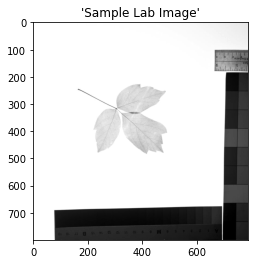

In [2]:
# This is a sample lab image that's used for demonstration purposes

img = cv2.imread('SamplePlant.jpg', 0)
plt.title("'Sample Lab Image'")
plt.imshow(img, cmap="gray")

# Image Preprocessing

In [3]:
# Cropping and Resizing the Image in order to get rid of Paint bar

In [4]:
def crop(image):

    # Getting resolution of image
    img_y_axis = image.shape[0]
    img_x_axis = image.shape[1]

    # We only need the leaf and no the Paint bar
    
    # Removing the paint bar from the Right
    img_x_axis = img_x_axis - 170

    # For y axis we have variable lengths. Mostly between the range of 600 - 900
    
    # Case where the num of pixels is in the dimension range between 700 and 770
    if 700 < img_y_axis < 770:
        img_y_axis = img_y_axis - 160
        
    # Case where the num of pixels is bigger then range
    elif img_y_axis >= 770:
        img_y_axis = img_y_axis - 185
    
    # Case where the num of pixels is small then range
    else:
        img_y_axis = img_y_axis - 145

    # Cropping the image to values computed above
    cropped_img = image[0:img_y_axis, 0:img_x_axis]
    
    # Resizing image while maintaining aspect ratio using 'cv2.INTER_AREA'
    cropped_img = cv2.resize(cropped_img, (500, 500), interpolation=cv2.INTER_AREA)

    return cropped_img

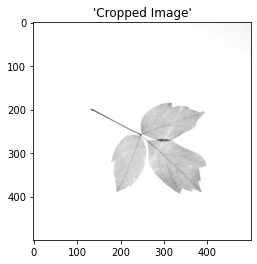

In [5]:
# This is the cropped image

img = cv2.imread('SamplePlant.jpg', 0)
img = crop(img)
plt.title("'Cropped Image'")
plt.imshow(img, cmap="gray")

In [6]:
# Following Filters were used

# Mean filter
def meanF(image):
    img = crop(image)
    im2 = cv2.blur(img, (5, 5))
    return im2


# Gaussian Filter
def gaussianF(image): 
    img = crop(image)
    im2 = cv2.GaussianBlur(img, (5, 5), 0)
    return im2


# Median Filter
def medianF(image):  
    img = crop(image)
    im2 = cv2.medianBlur(img, 5)
    return im2


# Bilateral Filter
def bilateralF(image):  
    img = crop(image)
    im2 = cv2.bilateralFilter(img, 9, 5, 5)
    return im2

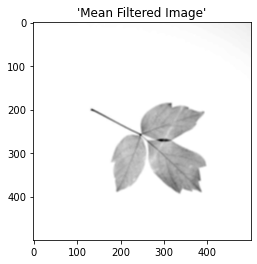

In [7]:
# Applying Mean Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = meanF(img)
plt.title("'Mean Filtered Image'")
plt.imshow(img, cmap="gray")

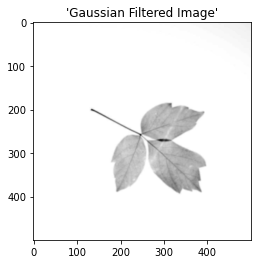

In [8]:
# Applying Gaussian Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = gaussianF(img)
plt.title("'Gaussian Filtered Image'")
plt.imshow(img, cmap="gray")

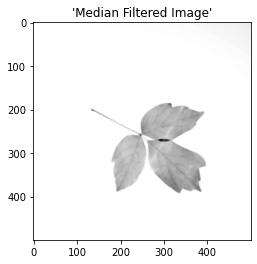

In [9]:
# Applying Median Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = medianF(img)
plt.title("'Median Filtered Image'")
plt.imshow(img, cmap="gray")

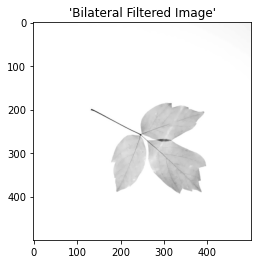

In [10]:
# Applying Bilateral Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = bilateralF(img)
plt.title("'Bilateral Filtered Image'")
plt.imshow(img, cmap="gray")

In [11]:
# Stage 2 of Preprocessing - Image enhancement with Histogram Equalization

In [12]:
# Equalization techniques

# Global Histogram Equalization Method
def histogram_equalization(image):      
    filtered_image = bilateralF(image)      
    equ = cv2.equalizeHist(filtered_image)
    return equ

# Adaptive Histogram Equalization
def clahe_equalization_Image(image):    
    filtered_image = bilateralF(image)      
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20, 20))
    cl1 = clahe.apply(filtered_image)
    return cl1

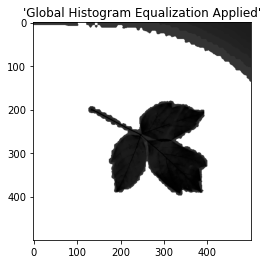

In [13]:
# Applying Global Histogram Equalization

img = cv2.imread('SamplePlant.jpg', 0)
img = histogram_equalization(img)
plt.title("'Global Histogram Equalization Applied'")
plt.imshow(img, cmap="gray")

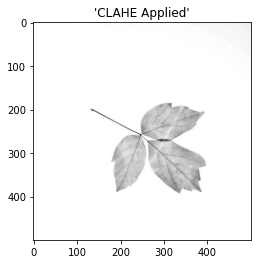

In [14]:
# Applying CLAHE

img = cv2.imread('SamplePlant.jpg', 0)
img = clahe_equalization_Image(img)
plt.title("'CLAHE Applied'")
plt.imshow(img, cmap="gray")

# Image Segmentation

In [15]:
# Thresholding Techniques

def simple_thresholding(image):
    img = clahe_equalization_Image(image)
    mean = img.mean()
    ret3, thresh = cv2.threshold(img, (mean/2)+10, 255, cv2.THRESH_BINARY_INV)
    return thresh


def otsu_binary_thresholding(image):
    img = clahe_equalization_Image(image)
    mean = img.mean()
    ret3, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh


def closing(image):
    img = otsu_binary_thresholding(image)
    kernel = np.ones((40, 40), np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    closing = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((7, 7), np.uint8))
    return closing

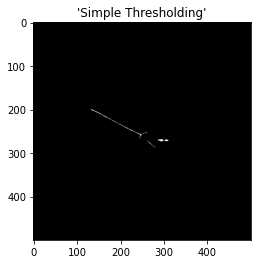

In [16]:
# Applying Simple Thresholding

img = cv2.imread('SamplePlant.jpg', 0)
img = simple_thresholding(img)
plt.title("'Simple Thresholding'")
plt.imshow(img, cmap="gray")

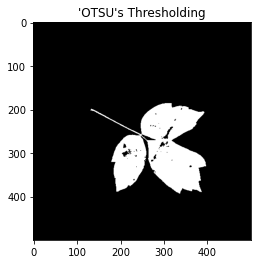

In [17]:
# Applying OTSU's Thresholding

img = cv2.imread('SamplePlant.jpg', 0)
img = otsu_binary_thresholding(img)
plt.title("'OTSU's Thresholding")
plt.imshow(img, cmap="gray")

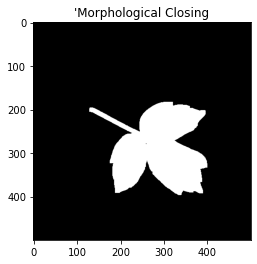

In [18]:
# Applying morphological Closing and dilation After Thresholding

img = cv2.imread('SamplePlant.jpg', 0)
img = closing(img)
plt.title("'Morphological Closing")
plt.imshow(img, cmap="gray")

In [19]:
# Edge Detection Techniques

def sobel_edge_detection(image):    # Using Sobel method
    processed_image = closing(image)
    sobelx = cv2.Sobel(processed_image, cv2.CV_64F, 1, 0, ksize=5)
    abs_sobelx = np.absolute(sobelx)
    sobel_unit = np.uint8(abs_sobelx)
    sobely = cv2.Sobel(processed_image, cv2.CV_64F, 0, 1, ksize=5)
    abs_sobely = np.absolute(sobely)
    sobel_unit = np.uint8(abs_sobely)
    return abs_sobelx

def canny_edge_detection(image):    # Using Canny Edge Detection
    processed_image = closing(image)
    edges = cv2.Canny(processed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours, hierarchy = cv2.findContours(processed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours[0]

def canny_edge_display(image):    
    processed_image = closing(image)
    edges = cv2.Canny(processed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return edges

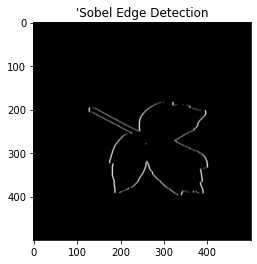

In [20]:
# Applying Sobel Edge Detection

img = cv2.imread('SamplePlant.jpg', 0)
img = sobel_edge_detection(img)
plt.title("'Sobel Edge Detection")
plt.imshow(img, cmap="gray")

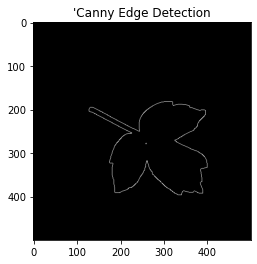

In [21]:
# Applying Canny Edge Detection

img = cv2.imread('SamplePlant.jpg', 0)
img = canny_edge_display(img)
plt.title("'Canny Edge Detection")
plt.imshow(img, cmap="gray")

# Feature Extraction

In [22]:
# Computing Hu's 7 Moments

def hu_moments(image):    
    img = closing(image)
    hu = cv2.HuMoments(cv2.moments(img)).flatten()
    return hu

In [23]:
# Hu moment values

img = cv2.imread('SamplePlant.jpg', 0)
hu_moments(img)

array([ 7.91300281e-04,  3.85506525e-09,  4.33707644e-11,  1.41412135e-12,
        8.15298681e-24,  8.51382434e-17, -7.49505562e-24])

In [24]:
# Computing Haralick Textures

def haralick_textures(image):    # Haralick Textures
    img = clahe_equalization_Image(image)
    textures = mt.features.haralick(img)
    ht_mean = textures.mean(axis=0)
    return ht_mean

In [25]:
# Haralick Textures

img = cv2.imread('SamplePlant.jpg', 0)
haralick_textures(img)

array([ 6.31373560e-01,  2.42258289e+01,  9.58293175e-01,  2.90368276e+02,
        9.06034250e-01,  4.97991510e+02,  1.13724727e+03,  2.01952344e+00,
        2.48440915e+00,  3.06742737e-03,  9.36932614e-01, -6.56673241e-01,
        9.54761354e-01])

In [26]:
# Extracting Shape features

def shape_features(image):
    shape_features = []
    cnt = canny_edge_detection(image) # Using the contours for this part

    area = cv2.contourArea(cnt) # Calucating Area 
    shape_features.append(area)

    perimeter = cv2.arcLength(cnt, True) # Calucating Perimeter 
    shape_features.append(perimeter)

    x, y, w, h = cv2.boundingRect(cnt) # Calucating Aspect Ratio
    aspect_ratio = float(w) / h
    shape_features.append(aspect_ratio)

    rectangularity = w * h / area # Calucating Rectangularity
    shape_features.append(rectangularity)

    circularity = (perimeter ** 2) / area # Calucating Circularity
    shape_features.append(circularity)

    equi_diameter = np.sqrt(4 * area / np.pi) # Calucating Equi_diameter
    shape_features.append(equi_diameter)

    return shape_features

In [27]:
# Shape Features

img = cv2.imread('SamplePlant.jpg', 0)
shape_features(img)

[32006.0,
 1266.9402507543564,
 1.266355140186916,
 1.8119727551084173,
 50.151146628179454,
 201.8695243685723]

In [28]:
# These 3 feature extraction methods are applied to all images in order to extract features.
# The dataset.py file computes this for us.
# These features are converted into a dataset and used in the next part

# Building the Classification Models

In [29]:
# Required Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [30]:
# Reading our dataset that has been created using area, perimeter and haralick moments of the leafs under 'field' folder

data = pd.read_csv(r'C:\Users\Shrivi\COMP702 Project\Plant_features_2.0.csv')

In [31]:
# Shows the total number of Rows and columns in the dataset

data.shape

(11483, 26)

In [32]:
# Shows the first 10 and last 10 data of the dataset

data.head(-10)

,Species,hu1,hu2,hu3,hu4,hu5,hu6,hu7,haralick1,haralick2,...,haralick9,haralick10,haralick11,haralick12,haralick13,area,perimeter,aspect_ratio,circularity,equi_diameter
0,0,0.002980,0.002980,0.002980,0.002980,0.002980,0.002980,0.002980,0.815972,8.011287,...,1.056766,0.003668,0.247771,-0.834068,0.882663,475.5,162.325901,0.362319,3.627760,55.414717
1,0,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792,0.830901,7.789235,...,0.983099,0.003680,0.237191,-0.834236,0.868768,509.0,160.994947,0.634921,4.950884,50.922147
2,0,0.002607,0.002607,0.002607,0.002607,0.002607,0.002607,0.002607,0.731477,6.801442,...,1.517459,0.003557,0.339376,-0.826917,0.939040,479.0,151.681239,0.627119,4.557411,48.031729
3,0,0.002897,0.002897,0.002897,0.002897,0.002897,0.002897,0.002897,0.880149,7.974301,...,0.697542,0.003750,0.173911,-0.840738,0.797614,527.0,169.539104,0.457143,4.250474,54.541760
4,0,0.002479,0.002479,0.002479,0.002479,0.002479,0.002479,0.002479,0.736511,6.642105,...,1.492144,0.003560,0.334288,-0.826810,0.936716,410.0,135.681239,0.725490,4.602439,44.900972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468,184,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879,0.699444,24.029736,...,1.873195,0.003415,0.532584,-0.779088,0.952966,10922.0,544.249781,0.412322,1.680736,27.120292
11469,184,0.001029,0.001029,0.001029,0.001029,0.001029,0.001029,0.001029,0.649509,31.124670,...,2.283381,0.003238,0.714471,-0.744813,0.966025,16719.5,715.144223,0.334459,1.752684,30.588909
11470,184,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.546439,30.736745,...,2.916710,0.003088,0.845719,-0.750101,0.984660,16837.5,709.144223,0.355401,1.738619,29.866995
11471,184,0.000861,0.000861,0.000861,0.000861,0.000861,0.000861,0.000861,0.548125,34.485695,...,2.818898,0.003154,0.753639,-0.766462,0.984760,18588.5,689.369618,0.570833,1.768836,25.565832


In [33]:
# Now we set our labels as 'y' and the corresponding features to 'x'
y = data['Species']
X = data[['hu1', 'hu2', 'hu3', 'hu4', 'hu5', 'hu6', 'hu7', 'haralick1','haralick2','haralick3','haralick4','haralick5','haralick6','haralick7','haralick8','haralick9','haralick10','haralick11','haralick12','haralick13', 'area', 'perimeter', 'aspect_ratio', 'circularity', 'equi_diameter']]

In [34]:
# Now we can split the data into training(90%) and testing(10%) set.
# Note the data is shuffled by default (i.e. default: shuffle=True)
# Note we don't shuffle the data again as its has been done already and ensures both models are trained/tested in same way

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10)

In [35]:
# The differernt classifiers - SVM and RFC
# In order to use the SVM, let model = SVM (Note this takes atleast an hour to train)

SVM = svm.SVC(kernel='linear')
RFC = RandomForestClassifier(n_estimators=500)

model = RFC

In [36]:
# Training the model

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [37]:
# Testing the model

y_pred = model.predict(X_test)

In [38]:
# Getting the score of the model. 

score = accuracy_score(y_test,y_pred) * 100
print(f'The score of the model is: {round(score,1)}%')

The score of the model is: 76.4%


# Computing the Confusion Matrix

<AxesSubplot:>

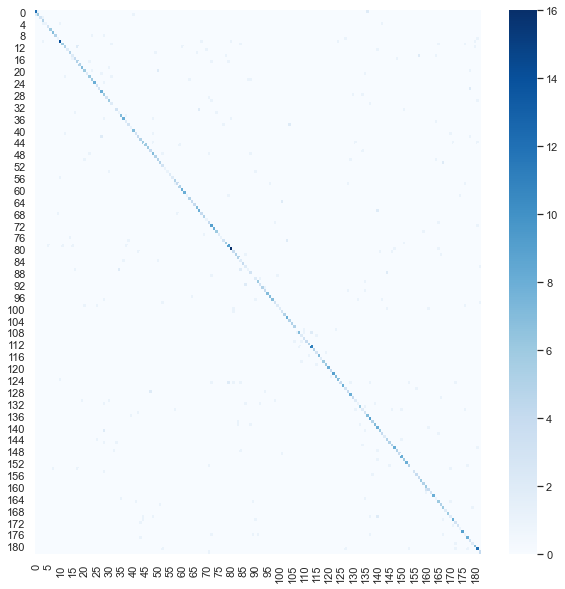

In [43]:
CM = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(CM)
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues")

# Using the Model on User Inputted Image

In [40]:
# In oder to use this model on a given image

# load the leaf image
img = cv2.imread('SamplePlant.jpg', 0)

# Getting shape descrioptors of Image
shape_descriptors = shape_features(img)

# Getting Hu Moments of Image
hu = hu_moments(img)

# Getting Haralick textures of Image
haralick = haralick_textures(img)

# Appending the data
feature_vector = np.append(haralick, hu)
feature_vector = np.append(shape_descriptors, feature_vector)
feature_vector 

array([ 3.20060000e+04,  1.26694025e+03,  1.26635514e+00,  1.81197276e+00,
        5.01511466e+01,  2.01869524e+02,  6.31373560e-01,  2.42258289e+01,
        9.58293175e-01,  2.90368276e+02,  9.06034250e-01,  4.97991510e+02,
        1.13724727e+03,  2.01952344e+00,  2.48440915e+00,  3.06742737e-03,
        9.36932614e-01, -6.56673241e-01,  9.54761354e-01,  7.91300281e-04,
        3.85506525e-09,  4.33707644e-11,  1.41412135e-12,  8.15298681e-24,
        8.51382434e-17, -7.49505562e-24])

In [44]:
# We then pass these features of the inputed leaf back to the model to classify.
# The numeric value produced represents the class of plant species it belongs to.
# This Class species can then be identified using the number as an index